In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
from collections import OrderedDict

## Data Import

In [2]:
df = pd.read_csv('name_name.csv', dtype={"reps": np.int64, "comm" : str, "auth" : str})


## Data Cleaning

In [3]:
df = df.dropna()


## Sample Graph

In [4]:
#dfn = df.sample(1000)
#del df
#df = dfn

In [27]:
graph = nx.from_pandas_edgelist(df.sample(10000), source = 'comm', target = 'auth', edge_attr = 'reps',create_using = nx.DiGraph())

In [28]:
pg = nx.pagerank(graph, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='reps', dangling=None)

## Distance

## Score neighbours

In [29]:
def check_neighbourhood(graph, node, radius):
    level = [n for n in nx.neighbors(graph, node)]
    if radius == 1:
        return level
    total_list = []
    total_list.extend(level)
    next_level = []
    radius = radius - 1;
    for i in range(radius):
        for item in level:
            m = [n for n in nx.neighbors(graph, item)]
            next_level.extend(m)
        del level[:]
        level.extend(next_level)
        total_list.extend(next_level)
        del next_level[:]
    return list(set(total_list))


In [30]:
def normalize(pg):
    dpg = pd.DataFrame([pg], columns=pg.keys())
    dpg = dpg.transpose()
    dpg = (dpg - dpg.mean()) / (dpg.max() - dpg.min())
    dpg = 2*dpg[0] + 1
    scores = dpg.to_dict()
    del dpg
    return scores

In [38]:
def score_neighbours(pg, graph, node, radius):
    pg = normalize(pg)
    path = nx.single_source_shortest_path_length(graph ,source=node,cutoff=radius)
    neighbourhood = {}
    for item in path:
        if(path[item]):
            neighbourhood[item] = pg[item]/np.log10(path[item] + 1)
        else:
            neighbourhood[item] = 0
    return OrderedDict(sorted(neighbourhood.items(), key=itemgetter(1), reverse=True))        

In [39]:
def score_node(pg, gu, source, destination):
    pg = normalize(pg)
    length = nx.shortest_path_length(gu, source=source, target=destination, weight=None, method='dijkstra')
    if(length == 0):
        return 0
    return pg[destination]/np.log10(length)

In [33]:
def plot_aroundme(pg, graph, node, radius):
    path = nx.single_source_shortest_path_length(graph ,source=node,cutoff=radius)
    nodes = list(path.keys())
    pos = nx.spring_layout(gu)
    k = gu.subgraph(nodes)
    width = normalize(pg)
    width = list(width.values())
    plt.figure(3, figsize=(12,12))
    nx.draw(k, pos=pos, node_size=18, node_color='pink', font_size=12, alpha=0.8, with_labels = True, edge_color='b', node_shape='^')
    plt.savefig('labels_1.png')
    plt.show()
    plt.figure(1, figsize=(12,12))
    nx.draw_spectral(k,font_size=12, node_color='pink', with_labels=True, node_shape='^', edge_color='b')
    plt.savefig('labels_2.png')
    plt.show()

In [34]:
gu = graph.to_undirected()

In [36]:
len(check_neighbourhood(gu, "Linus Torvalds", 3))

41

/Users/sachando/Library/Python/3.6/lib/python/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


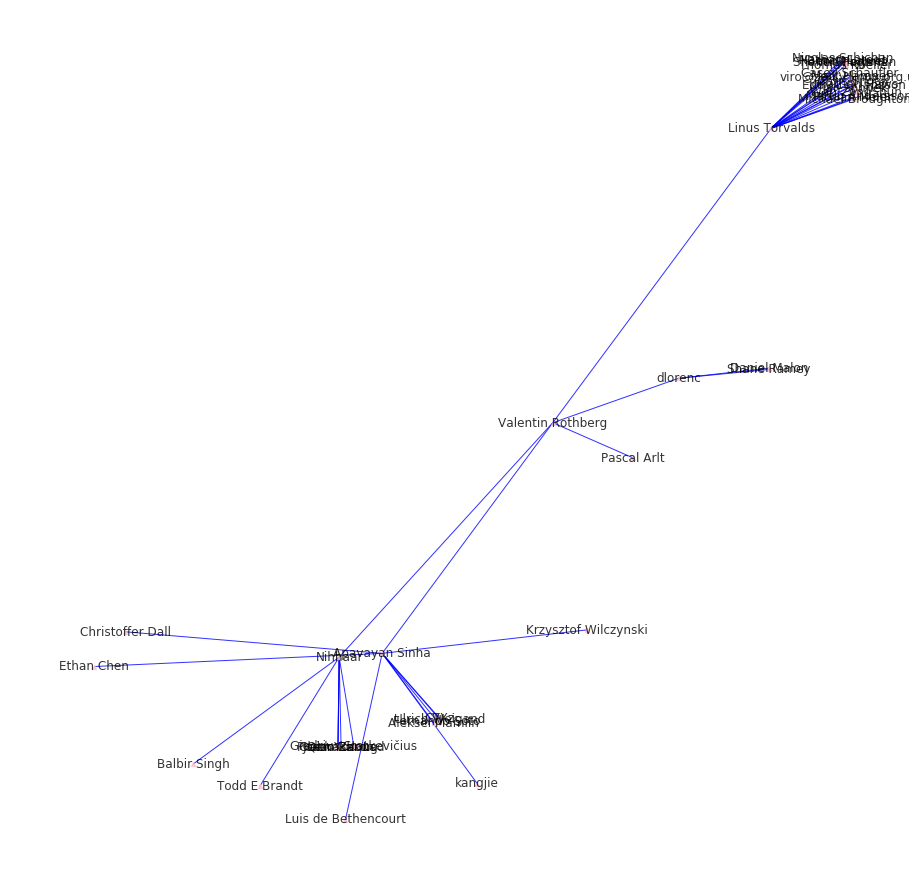

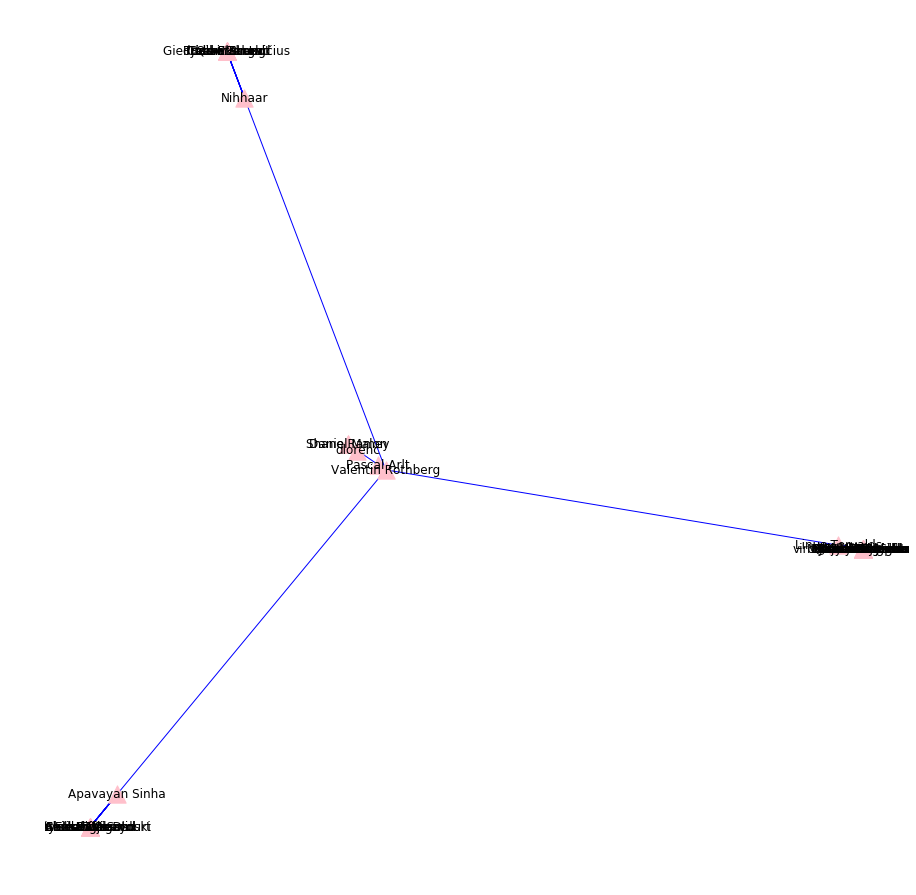

In [37]:
plot_aroundme(pg, gu, "Linus Torvalds", 3)

In [41]:
score_node(pg, gu, "Linus Torvalds", "Nihhaar")

2.965557642223124

In [42]:
score_neighbours(pg, gu, "Linus Torvalds", 2)

OrderedDict([('Valentin Rothberg', 4.15376727487492),
             ('Wan ZongShun', 3.699379051290403),
             ('Casey Schaufler', 3.103149156423239),
             ('Chris Snook', 3.103149156423239),
             ('Thomas Koeller', 3.0802172373898866),
             ('Will Page', 3.011421480289829),
             ('Nathan Laredo', 3.011421480289829),
             ('Shane Shrybman', 3.011421480289829),
             ('jan sonnek', 2.988489561256477),
             ('Michael Broughton', 2.988489561256477),
             ('viro@zenIV.linux.org.uk', 2.988489561256477),
             ('Martin Andersson', 2.988489561256477),
             ('Maik Hampel', 2.988489561256477),
             ('Florian Meier', 2.988489561256477),
             ('Nicolas Schichan', 2.988489561256477),
             ('Eddy L O Jansson', 2.988489561256477),
             ('Jonathan Haws', 2.988489561256477),
             ('Benoît Laniel', 2.965557642223124),
             ('Apavayan Sinha', 1.871058552409788),
           